In [ ]:
# GDrive mount (required only if being run on GDrive)
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# importing dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
##### PLEASE SET THESE CAREFULLY refer :instructions.txt
INPUT_DIR = "/gdrive/Shareddrives/DLNN_ProjC1/output/sync_data_ishan/train"
#####

#constants
ATTRIBUTE_NAMES = ["accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z", "CLASS", "xTIME", "yTIME"]

In [ ]:
# loading all training data into RAM
sessions = {}
counts_of_classes = pd.DataFrame([], columns = ["filename", "zero", "one", "two", "three"])

input_files = sorted(os.listdir(INPUT_DIR))

for input_file in input_files:
  if ".csv" in input_file:
    print("reading:", input_file)
    sessions[input_file] = pd.read_csv(os.path.join(INPUT_DIR, input_file), names = ATTRIBUTE_NAMES)

    value_counts = sessions[input_file].CLASS.value_counts()
    for col in range(0, 4):
      if col not in value_counts.keys():
        value_counts[col] = 0
    counts_of_classes = counts_of_classes.append([{"filename": input_file,
                                                      "zero": value_counts[0], "one": value_counts[1], "two": value_counts[2], "three": value_counts[3]}], 
                                                      ignore_index=True)


reading: subject_001_01_x_sync.csv
reading: subject_001_02_x_sync.csv
reading: subject_001_03_x_sync.csv
reading: subject_001_04_x_sync.csv
reading: subject_001_05_x_sync.csv
reading: subject_001_06_x_sync.csv
reading: subject_001_07_x_sync.csv
reading: subject_001_08_x_sync.csv
reading: subject_002_01_x_sync.csv
reading: subject_002_02_x_sync.csv
reading: subject_002_03_x_sync.csv
reading: subject_002_04_x_sync.csv
reading: subject_002_05_x_sync.csv
reading: subject_003_01_x_sync.csv
reading: subject_003_02_x_sync.csv
reading: subject_003_03_x_sync.csv
reading: subject_004_01_x_sync.csv
reading: subject_004_02_x_sync.csv
reading: subject_005_01_x_sync.csv
reading: subject_005_02_x_sync.csv
reading: subject_005_03_x_sync.csv
reading: subject_006_01_x_sync.csv
reading: subject_006_02_x_sync.csv
reading: subject_006_03_x_sync.csv
reading: subject_007_01_x_sync.csv
reading: subject_007_02_x_sync.csv
reading: subject_007_03_x_sync.csv
reading: subject_007_04_x_sync.csv
reading: subject_008

In [ ]:
# let's see how many instances of each class are present in each file
counts_of_classes["total"] = counts_of_classes.zero + counts_of_classes.one + counts_of_classes.two + counts_of_classes.three
print(counts_of_classes)

                     filename   zero   one   two  three  total
0   subject_001_01_x_sync.csv  25774  2844  3152   6120  37890
1   subject_001_02_x_sync.csv  50264  3908  4592  11408  70172
2   subject_001_03_x_sync.csv  33194  2692  4424   2836  43146
3   subject_001_04_x_sync.csv  39548  4904  3524   6980  54956
4   subject_001_05_x_sync.csv  44265  4520  7004   3332  59121
5   subject_001_06_x_sync.csv  33259  2500  2288    584  38631
6   subject_001_07_x_sync.csv  26555     0  1788   3080  31423
7   subject_001_08_x_sync.csv  32470  2020  2548  29724  66762
8   subject_002_01_x_sync.csv  44187  2028  2908   6876  55999
9   subject_002_02_x_sync.csv  38809   964  1972  13656  55401
10  subject_002_03_x_sync.csv  36277  1248  2004   9268  48797
11  subject_002_04_x_sync.csv  39437  1668  1932   8424  51461
12  subject_002_05_x_sync.csv  30227  1888  1684   8520  42319
13  subject_003_01_x_sync.csv  27677  2112  2712   3812  36313
14  subject_003_02_x_sync.csv  40254  1852   424   4680

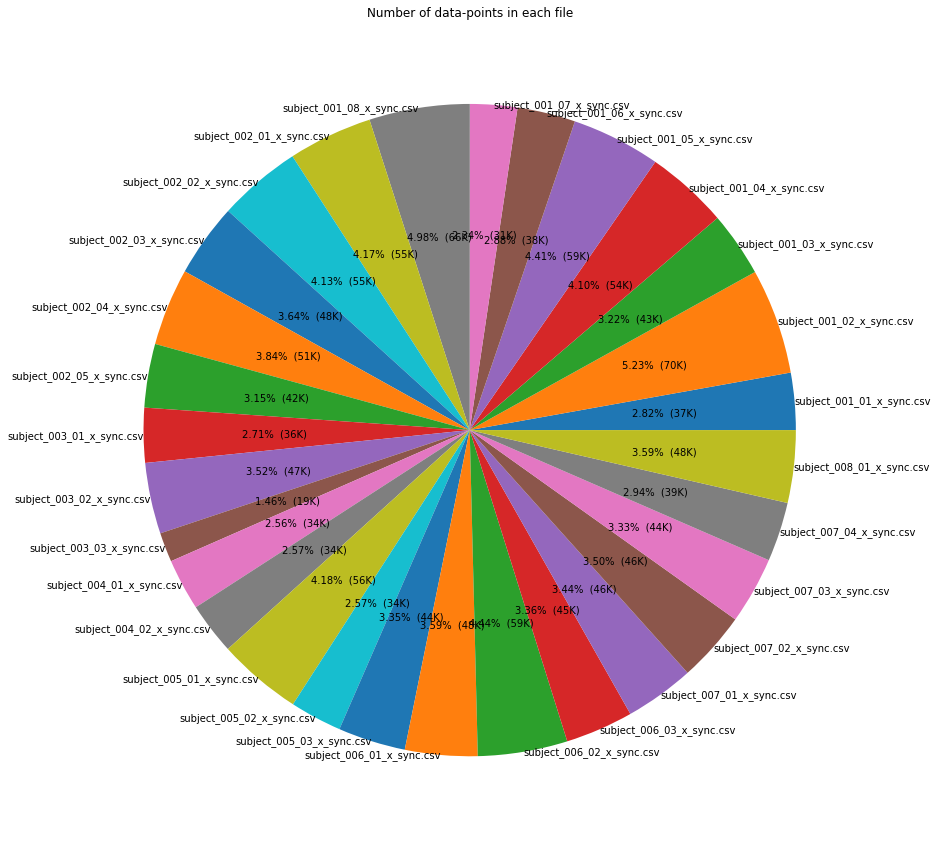

In [ ]:
# we plot to see how much data is present in each file

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        val = val // 1000
        return '{p:.2f}%  ({v:d}K)'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(15, 15))
plt.title("Number of data-points in each file")
plt.pie(counts_of_classes.total, labels = counts_of_classes.filename,
        labeldistance= True, autopct=make_autopct(counts_of_classes.total))
plt.show()
# plt.legend()